In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap
from squlearn.optimizers import SLSQP

In [2]:
executor = Executor("statevector_simulator")

Define parameterized quantum circuit $Q(x,\theta)$

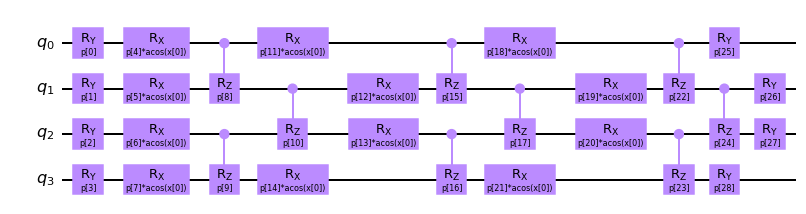

In [3]:
nqubits = 4

number_of_layers = 2
pqc = LayeredFeatureMap.from_string(
    "Ry(p)-3[Rx(p,x;=y*np.arccos(x),{y,x})-crz(p)]-Ry(p)", num_qubits=nqubits, num_features=1
)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [4]:
ising_op = SummedPaulis(nqubits)
print(ising_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


Example function: $log(x)$

In [5]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.random.rand(ising_op.num_parameters)

reg = QNNRegressor(pqc, ising_op, executor, SquaredLoss(), SLSQP(), param_ini, param_op_ini)

Optimization of the regression

In [6]:
reg.fit(x_space, ref_values)

theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 0.03503652 0.29844947
 0.05851249 0.85706094 0.37285403 0.67984795 0.25627995 0.34758122
 0.00941277 0.35833378 0.94909418 0.21789901 0.31939137 0.91777239
 0.03190367 0.06508454 0.629829   0.87381344 0.00871573 0.74657724
 0.81284117 0.07571745 0.65645533 0.5092622 ]
Current value: 15.826222005244189
theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 0.03503652 0.29844947
 0.05851249 0.85706094 0.37285403 0.67984795 0.25627995 0.34758122
 0.00941277 0.35833378 0.94909418 0.21789901 0.31939137 0.91777239
 0.03190367 0.06508454 0.629829   0.87381344 0.00871573 0.74657724
 0.81284117 0.07571745 0.65645533 0.5092622 ]
Grad length: 42.674773568850185
grad [ -3.80905038  -0.2403326   -2.3089622   -0.33317863 -13.22177268
  -0.80893675   0.95308506  -6.75444701  -0.31674793   1.8908097
   0.06433178 -16.332728

In [7]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

Result Param: [ 0.26645372 -0.28805007  0.41080719 -0.18862327  1.52600088  0.75574035
 -0.26535096  0.38278443  1.6061797   0.37766139 -1.899289    0.32730033
 -0.54147472 -0.09008657  1.24032091  0.70480379  1.37188406 -2.02585439
  1.04762317 -0.69884183 -0.33404589 -0.21043753 -0.99074283  1.08429519
 -1.42719443 -0.00978207  1.26714445  1.16548071 -1.10861749]
Result ParamOp: [-2.22854323 -2.18062981  9.05105376  2.78827125  1.27746911]


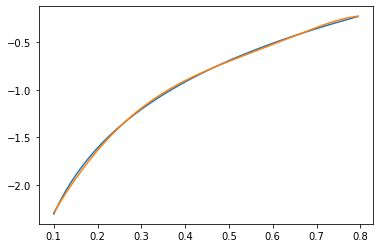

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

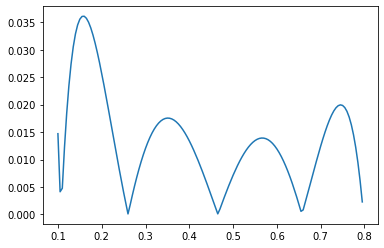

In [9]:
plt.plot(x, np.abs(y - np.log(x)))

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:133: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


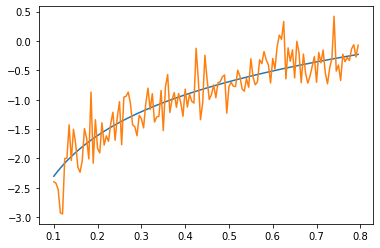

In [10]:
qasm = Executor("qasm_simulator")
qnn_qasm = QNNRegressor(pqc, ising_op, qasm, SquaredLoss, SLSQP(), reg.param, reg.param_op)
y = qnn_qasm.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

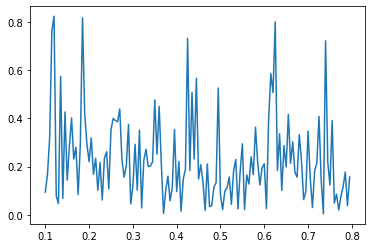

In [11]:
plt.plot(x, np.abs(y - np.log(x)))